<a href="https://colab.research.google.com/github/AadityaPanchakshikar/Technical-Analysis-w-py/blob/main/Trendline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trendline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
import numpy as np
import warnings
import math
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv("nifty5min.csv")
df = df[(df.Date > '2022-09-02 9:00:00') & (df.Date < '2022-09-06 15:30:00')]
df.set_index("Date", inplace=True)
df = df[['Open', 'High', 'Low', 'Close']]
df.head(10)

,Open,High,Low,Close
Date,,,,
2022-09-05 09:15:00,17551,17616,17551,17612
2022-09-05 09:20:00,17613,17615,17584,17597
2022-09-05 09:25:00,17601,17608,17571,17595
2022-09-05 09:30:00,17595,17632,17592,17632
2022-09-05 09:35:00,17631,17639,17620,17627
2022-09-05 09:40:00,17627,17646,17625,17638
2022-09-05 09:45:00,17639,17641,17620,17622
2022-09-05 09:50:00,17622,17639,17609,17638
2022-09-05 09:55:00,17639,17644,17630,17635


In [ ]:
real = talib.HT_TRENDLINE(df.Close)
df['trend'] = real
df.dropna(inplace=True)

<AxesSubplot:xlabel='Date'>

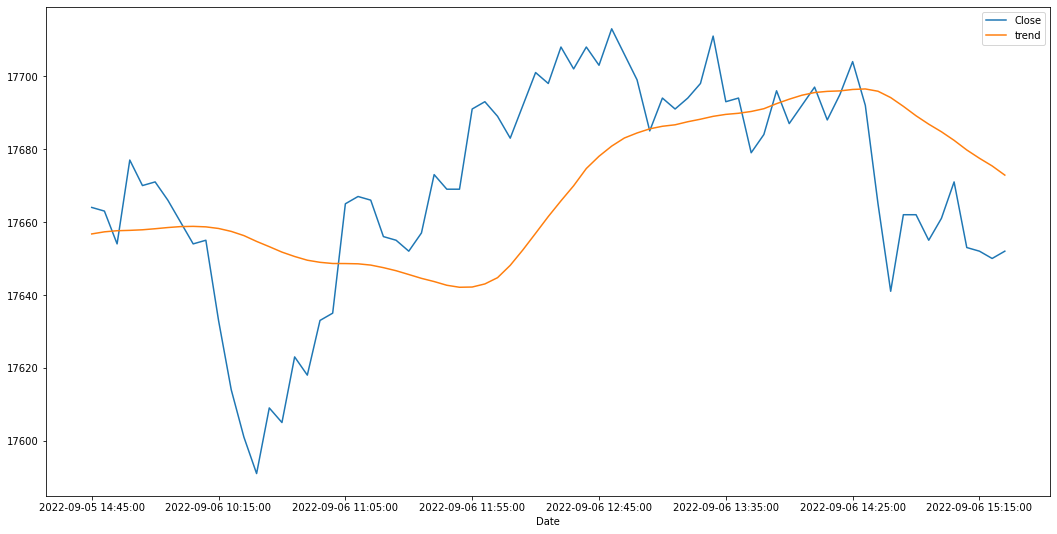

In [ ]:
df[['Close','trend']].plot(figsize=(18,9))

In [ ]:
df2 = df[['trend']]
df2['deg'] = 0
df2.reset_index(inplace=True)
i = 3
while i in range(3, len(df2)):
    x = df2.index[i-3:i]
    y = df2.trend[i-3:i]
    slope, intercept = np.polyfit(x,y,1)
    deg = math.degrees(slope)
    df2['deg'].iat[i] = deg
    i = i + 1
df2.set_index('Date', inplace=True)
df['deg'] = df2['deg']
df

,Open,High,Low,Close,trend,deg
Date,,,,,,
2022-09-05 14:45:00,17670,17671,17662,17664,17656.729781,0.000000
2022-09-05 14:50:00,17663,17668,17659,17663,17657.307932,0.000000
2022-09-05 14:55:00,17662,17672,17653,17654,17657.611154,0.000000
2022-09-05 15:00:00,17654,17678,17651,17677,17657.711009,25.249460
2022-09-05 15:05:00,17677,17679,17665,17670,17657.868213,11.547296
...,...,...,...,...,...,...
2022-09-06 15:05:00,17661,17681,17658,17671,17682.404821,-125.540386
2022-09-06 15:10:00,17672,17674,17651,17653,17679.760167,-127.036502
2022-09-06 15:15:00,17653,17657,17649,17652,17677.481170,-143.167693


In [ ]:
df['position'] = np.where(df.deg < 0,-1,1)
df

,Open,High,Low,Close,trend,deg,position
Date,,,,,,,
2022-09-05 14:45:00,17670,17671,17662,17664,17656.729781,0.000000,1
2022-09-05 14:50:00,17663,17668,17659,17663,17657.307932,0.000000,1
2022-09-05 14:55:00,17662,17672,17653,17654,17657.611154,0.000000,1
2022-09-05 15:00:00,17654,17678,17651,17677,17657.711009,25.249460,1
2022-09-05 15:05:00,17677,17679,17665,17670,17657.868213,11.547296,1
...,...,...,...,...,...,...,...
2022-09-06 15:05:00,17661,17681,17658,17671,17682.404821,-125.540386,-1
2022-09-06 15:10:00,17672,17674,17651,17653,17679.760167,-127.036502,-1
2022-09-06 15:15:00,17653,17657,17649,17652,17677.481170,-143.167693,-1


In [ ]:
x = df.index.tolist()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Candlestick(x=df.index,
                open=df.Open, high=df.High,
                low=df.Low, close=df.Close))

fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(
    width=800, height=600,
    title="Nifty",
    yaxis_title='Price',
    xaxis=dict(type = "category")
)

fig.add_trace(go.Scatter(
    x=x,
    y=df.trend,
    name ='Trendline',
    mode="markers",
    marker_size=10,
    marker = dict(color='green', symbol = "square-dot")
))

y = df['position'].tolist()
#y = df['deg'].tolist()
fig.add_trace(go.Scatter(x=df.index, y=y, name="position"),
secondary_y=True,)

fig.show()